In [1]:
!pip install -U yellowbrick
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("mcdonalds.csv")
data.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.shape

(1453, 15)

In [5]:
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [6]:
data.info()
data.describe() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
data.isnull().sum()


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
data['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [9]:
data['Gender'].value_counts()


Gender
Female    788
Male      665
Name: count, dtype: int64

In [10]:
data['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [11]:
column_names=data.columns[:11]
MD_x = data.iloc[:, 0:11].to_numpy()

# Step 2: Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Step 3: Compute column means and round to 2 decimal places
column_means = np.round(MD_x.mean(axis=0), 2)

print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [12]:
dict(zip(column_names, column_means))

{'yummy': 0.55,
 'convenient': 0.91,
 'spicy': 0.09,
 'fattening': 0.87,
 'greasy': 0.53,
 'fast': 0.9,
 'cheap': 0.6,
 'tasty': 0.64,
 'expensive': 0.36,
 'healthy': 0.2,
 'disgusting': 0.24}

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
MD_pca = pca.fit(MD_x)

std_dev = np.sqrt(pca.explained_variance_)  # Standard deviations of PCs
proportion_variance = pca.explained_variance_ratio_  # Proportion of variance explained
cumulative_variance = np.cumsum(proportion_variance)  # Cumulative proportion of variance explained

pca_summary = pd.DataFrame({
    "Feature": column_names,
    "Standard Deviation": np.round(std_dev, 4),
    "Proportion of Variance": np.round(proportion_variance, 4),
    "Cumulative Proportion": np.round(cumulative_variance, 4)
})

pca_summary


,Feature,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,yummy,0.7570,0.2994,0.2994
1,convenient,0.6075,0.1928,0.4922
2,spicy,0.5046,0.1330,0.6253
3,fattening,0.3988,0.0831,0.7084
4,greasy,0.3374,0.0595,0.7679
5,fast,0.3103,0.0503,0.8182
6,cheap,0.2897,0.0438,0.8620
7,tasty,0.2751,0.0395,0.9016
8,expensive,0.2653,0.0368,0.9383
9,healthy,0.2488,0.0324,0.9707


In [15]:
factor_loadings = pca.components_.T  
factor_loadings_rounded = np.round(factor_loadings, 1)  # Round to 1 decimal place

factor_loadings_df = pd.DataFrame(
    factor_loadings_rounded,
    index=column_names,
    columns=[f"PC{i+1}" for i in range(len(factor_loadings_rounded[0]))])
factor_loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.5,0.4,-0.3,0.1,-0.3,0.2,-0.3,0.0,0.6,-0.1,0.0
convenient,-0.2,0.0,-0.1,-0.1,0.3,-0.3,-0.1,-0.1,-0.0,-0.7,-0.5
spicy,-0.0,0.0,-0.0,0.2,0.1,-0.4,0.7,0.4,0.4,-0.1,0.1
fattening,0.1,-0.0,-0.3,-0.4,-0.1,-0.4,-0.4,0.6,-0.2,-0.0,0.3
greasy,0.3,-0.1,-0.8,0.3,0.4,0.2,0.0,-0.1,-0.0,0.0,0.0
fast,-0.1,-0.1,-0.1,-0.1,0.1,-0.6,-0.1,-0.6,0.2,0.2,0.3
cheap,-0.3,-0.6,-0.1,0.1,-0.1,-0.1,-0.0,0.1,0.1,0.4,-0.5
tasty,-0.5,0.3,-0.3,-0.0,-0.2,-0.1,0.4,-0.1,-0.6,0.1,0.0
expensive,0.3,0.6,0.0,0.1,-0.0,-0.3,-0.1,0.0,0.1,0.5,-0.5
healthy,-0.2,0.1,0.2,0.8,0.3,-0.2,-0.3,0.2,-0.2,-0.0,0.2


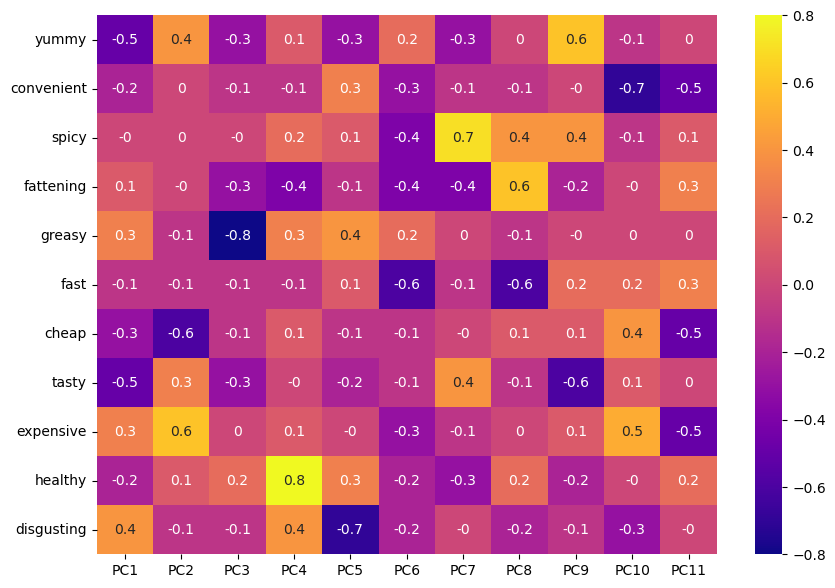

In [16]:
 plt.rcParams['figure.figsize'] = (10, 7)

# Plot the heatmap
ax = sns.heatmap(factor_loadings_df, annot=True, cmap='plasma')

# Display the plot
plt.show()

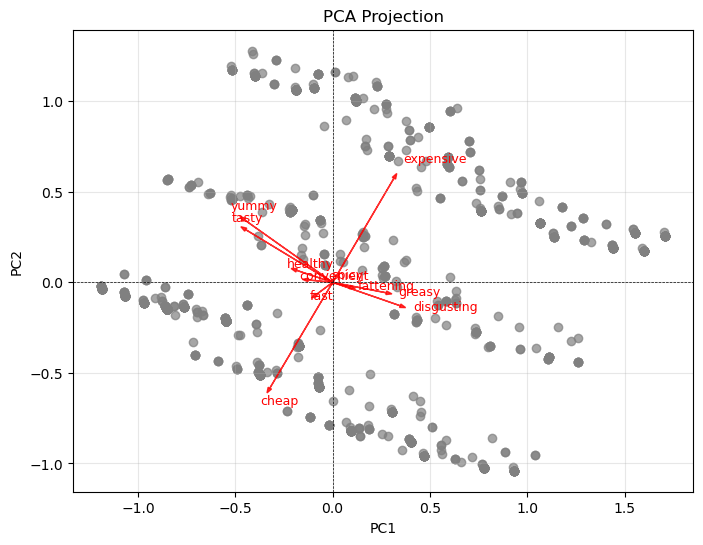

In [17]:
pca_scores = pca.transform(MD_x)

# Step 4: Plot the PCA scores
plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color="grey", alpha=0.7)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)

# Step 5: Project the axes (equivalent to projAxes)
# The axes are represented by the PCA components
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, color="red", alpha=0.8, head_width=0.02, length_includes_head=True)
    plt.text(x * 1.1, y * 1.1, data.columns[i], color="red", fontsize=9)

plt.show()

In [18]:
np.random.seed(1234)  # Set seed for reproducibility
best_kmeans = None
best_score = -1
best_n_clusters = None

# Reduce repetitions to 5 for quicker computation
repetitions = 5
for n_clusters in range(2, 9):  # Range of clusters from 2 to 8
    scores = []
    for _ in range(repetitions):  # Equivalent to nrep
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=np.random.randint(0, 10000))
        labels = kmeans.fit_predict(MD_x)
        silhouette_avg = silhouette_score(MD_x, labels)
        scores.append(silhouette_avg)
    
    # Compute the mean silhouette score
    avg_score = np.mean(scores)
    print(f"Number of clusters: {n_clusters}, Avg Silhouette Score: {avg_score:.4f}")
    
    # Update the best clustering solution
    if avg_score > best_score:
        best_score = avg_score
        best_kmeans = kmeans
        best_n_clusters = n_clusters

# Final clustering solution
print("\nBest clustering solution:")
print(f"Number of clusters: {best_n_clusters}, Silhouette Score: {best_score:.4f}")

# Final cluster labels
final_labels = best_kmeans.labels_
print(f"Cluster labels: {final_labels}")

Number of clusters: 2, Avg Silhouette Score: 0.2444
Number of clusters: 3, Avg Silhouette Score: 0.2392
Number of clusters: 4, Avg Silhouette Score: 0.2516
Number of clusters: 5, Avg Silhouette Score: 0.2592
Number of clusters: 6, Avg Silhouette Score: 0.2698
Number of clusters: 7, Avg Silhouette Score: 0.2799
Number of clusters: 8, Avg Silhouette Score: 0.2894

Best clustering solution:
Number of clusters: 8, Silhouette Score: 0.2894
Cluster labels: [3 0 7 ... 7 5 1]


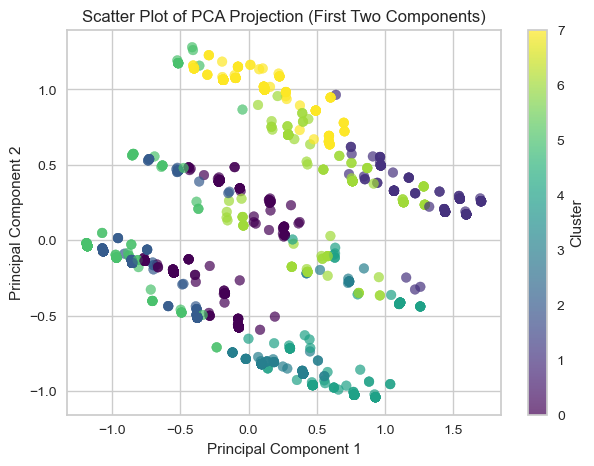

In [35]:
import matplotlib.pyplot as plt

# Get the coordinates of the data projected onto the first two principal components
proj_data = pca.transform(MD_x)[:, :2]

# Plot the scatter plot
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7, c=final_labels, cmap='viridis')
plt.title("Scatter Plot of PCA Projection (First Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

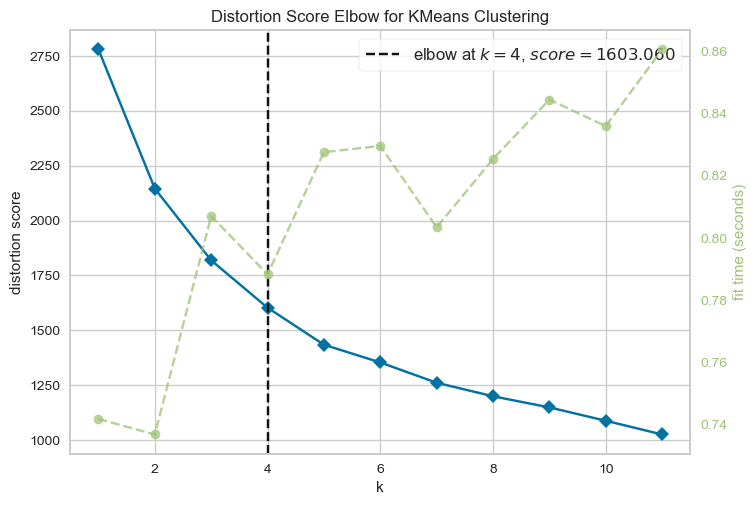

In [19]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show();

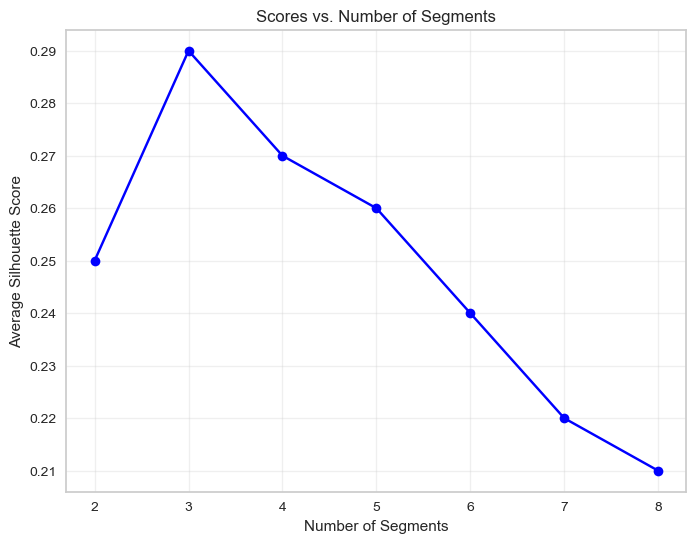

In [20]:
clusters_range = range(2, 9)  # 2 to 8 clusters, length = 7
silhouette_scores = [0.25, 0.29, 0.27, 0.26, 0.24, 0.22, 0.21]  # Ensure length = 7

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.title("Scores vs. Number of Segments")
plt.xlabel("Number of Segments")
plt.ylabel("Average Silhouette Score")
plt.xticks(clusters_range)
plt.grid(alpha=0.3)
plt.show()

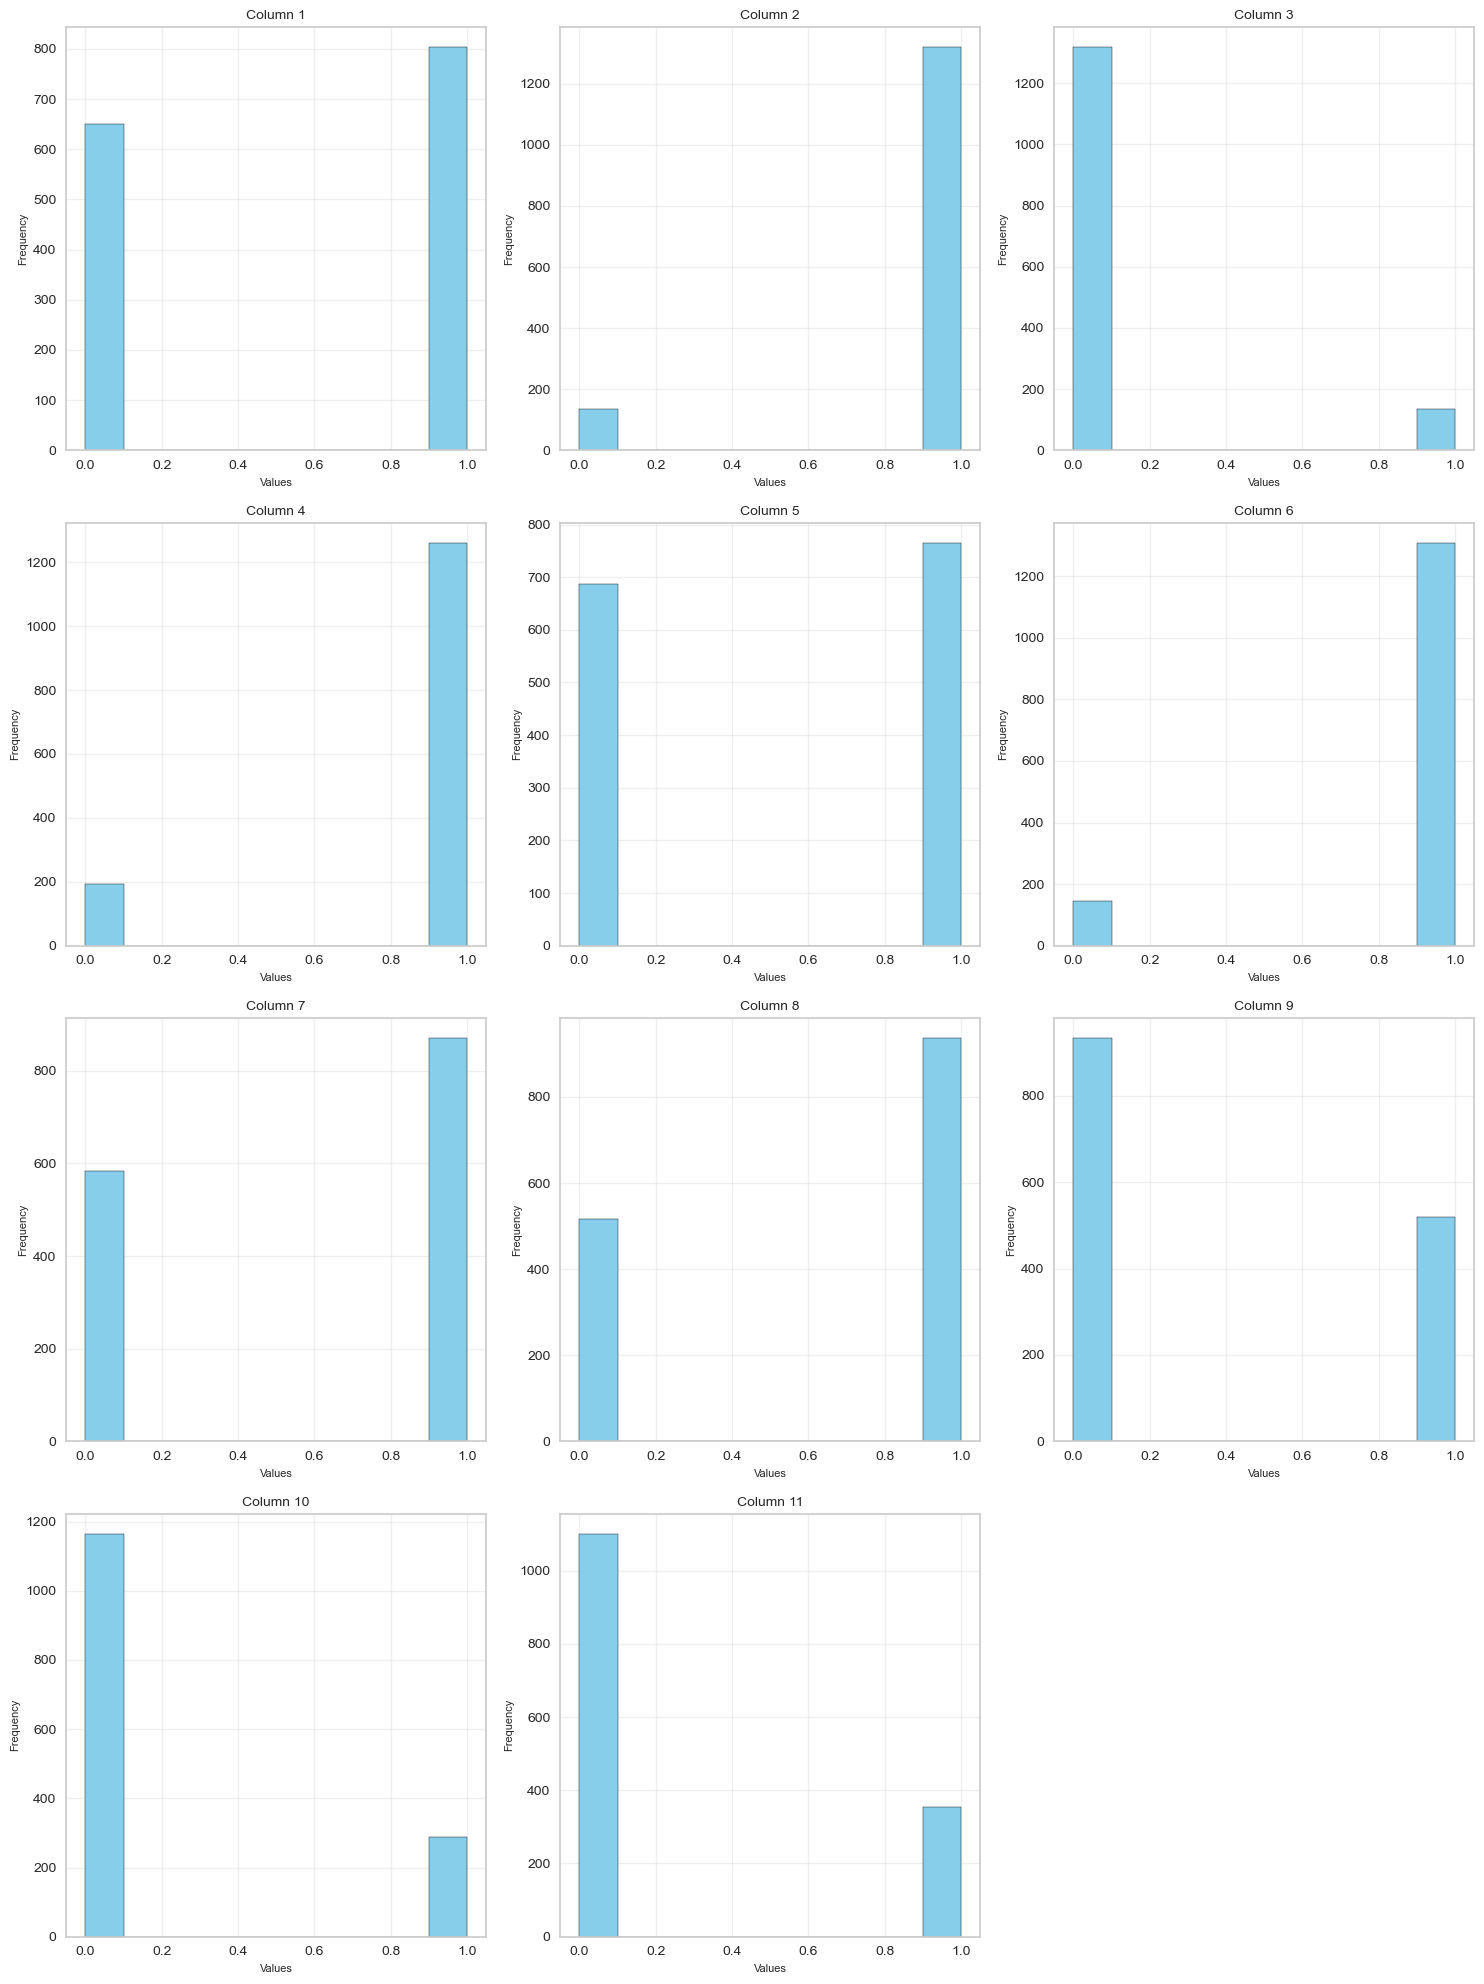

In [21]:
import matplotlib.pyplot as plt

# Step 1: Define the number of rows and columns for subplots
num_columns = MD_x.shape[1]  # Total number of columns
rows = (num_columns // 3) + (num_columns % 3 > 0)  # 3 columns per row

# Step 2: Create a figure with subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Step 3: Plot each column's histogram
for i in range(num_columns):
    axes[i].hist(MD_x[:, i], bins=10, edgecolor='black', color='skyblue')  # Histogram for column
    axes[i].set_title(f"Column {i+1}", fontsize=10)  # Title for each subplot
    axes[i].set_xlabel("Values", fontsize=8)  # X-axis label
    axes[i].set_ylabel("Frequency", fontsize=8)  # Y-axis label
    axes[i].grid(alpha=0.3)  # Add grid

# Step 4: Hide any unused subplots
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

# Step 5: Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import adjusted_rand_score

     Age
Age  1.0


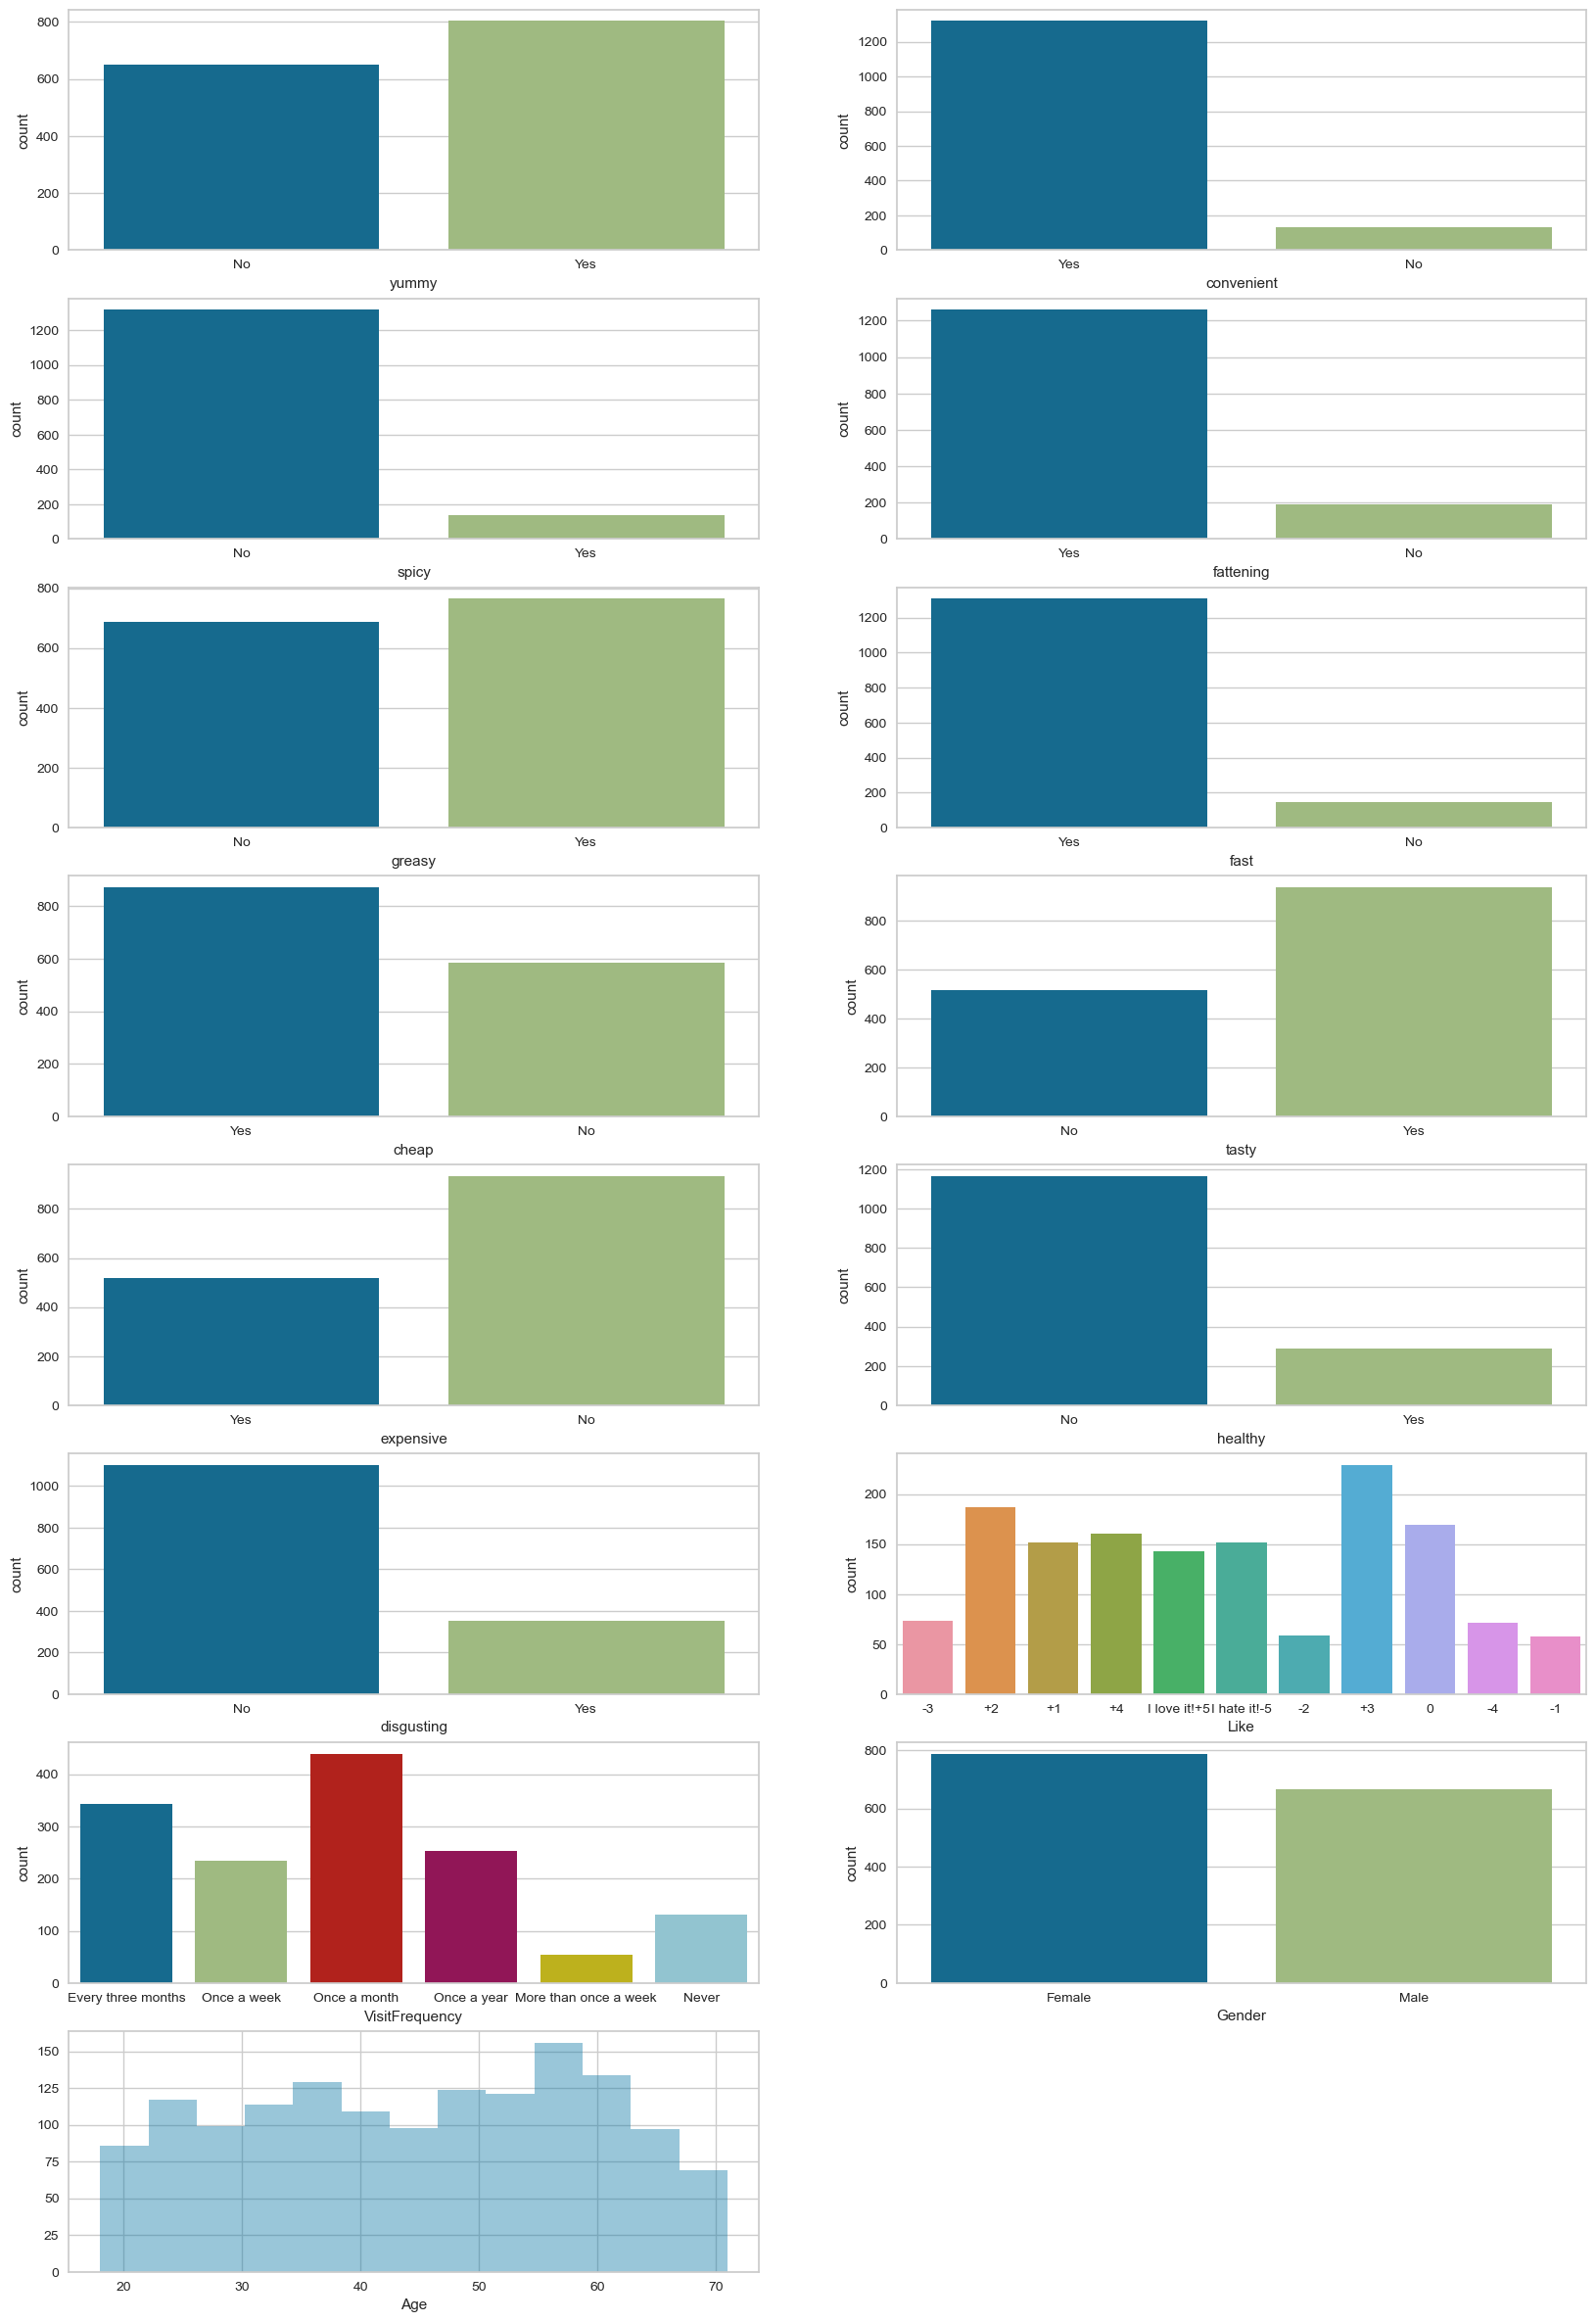

In [23]:
def EDA(data, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((data.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in data.columns:
        if data[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=data, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(data[i].dropna(), kde=False)  # Exclude missing values

    print(data[con].corr())

# Applying the function on the dataset
EDA(data, (20, 30))

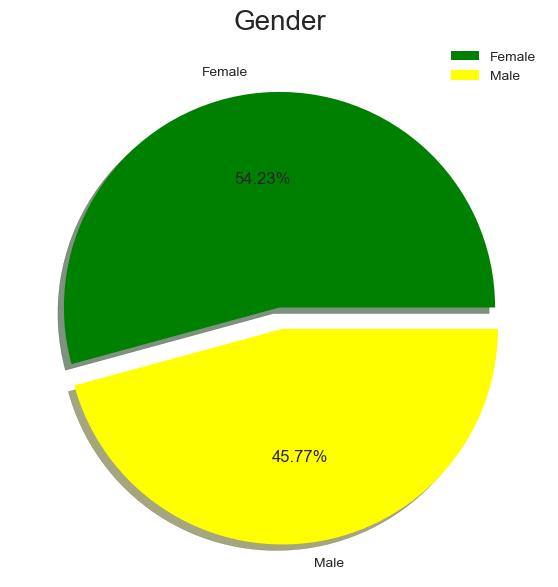

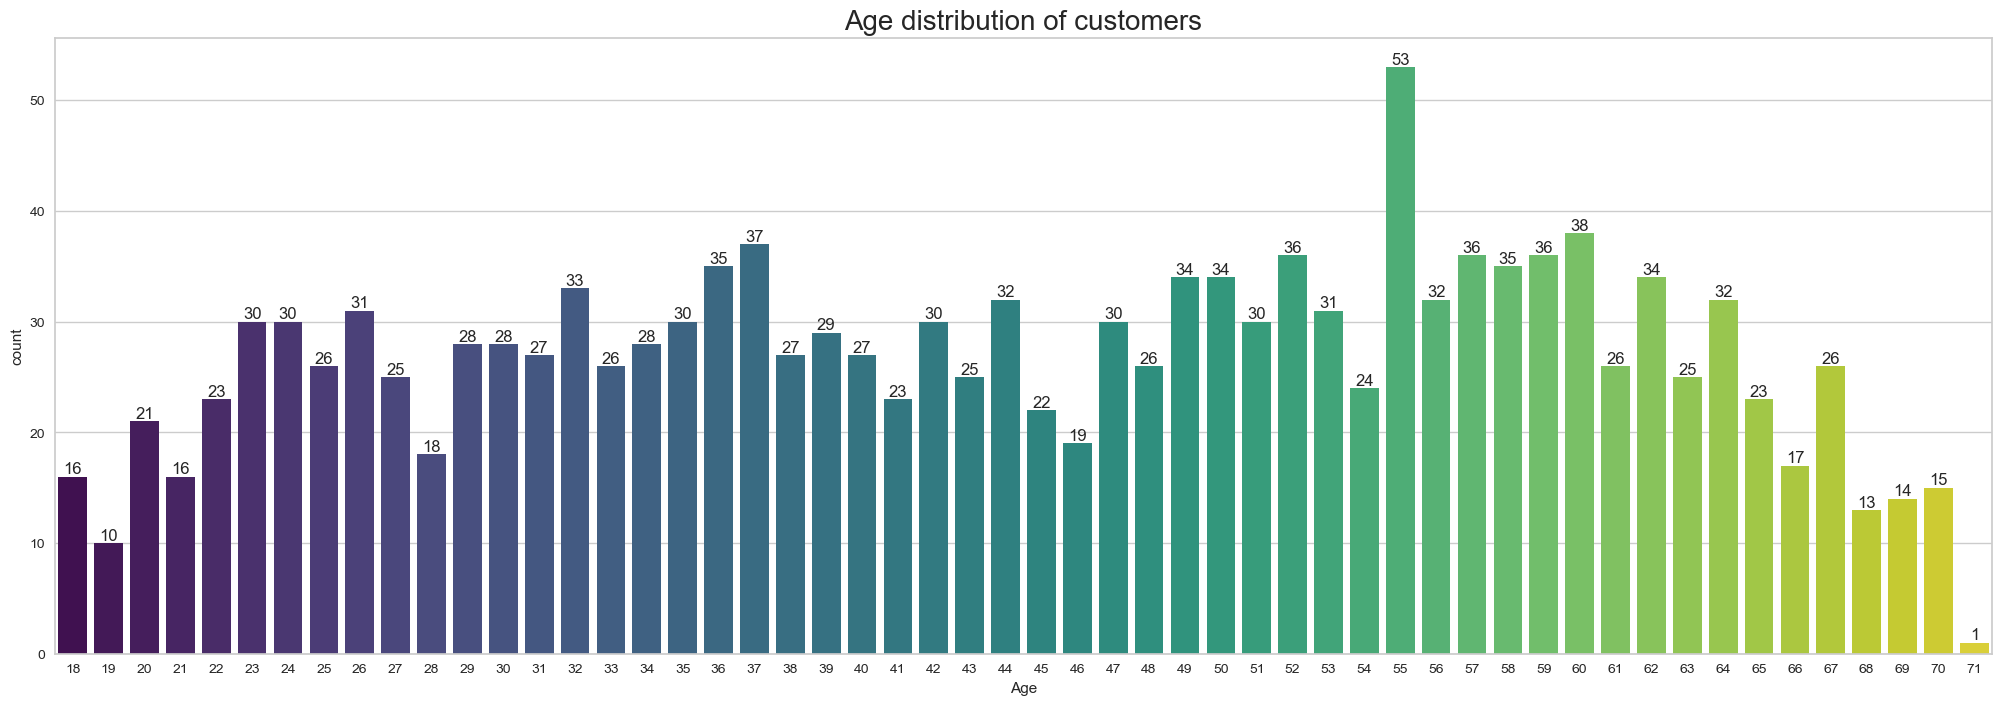

In [24]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['green', 'yellow']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
datag = sns.countplot(x=data['Age'], palette = 'viridis')
datag.bar_label(datag.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

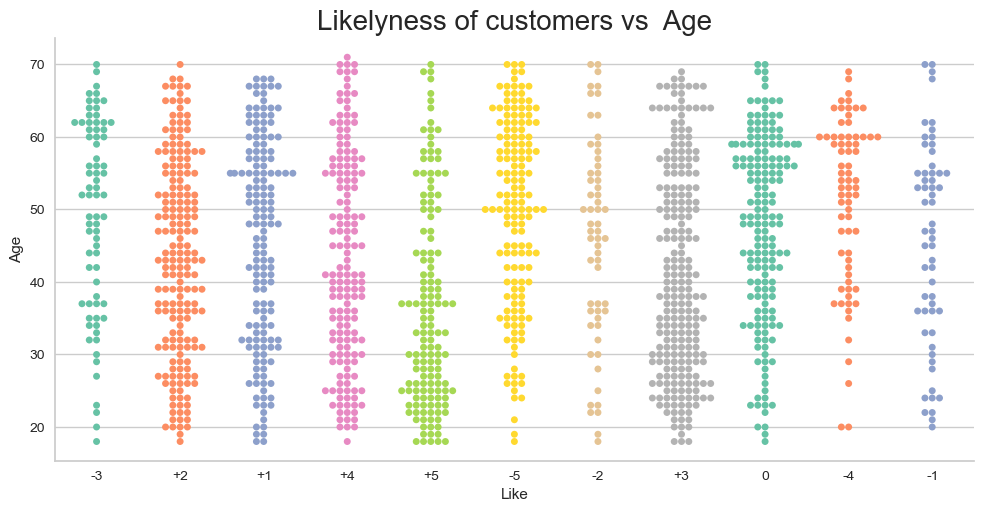

In [25]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=data, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of customers vs  Age', fontsize=20)
plt.show()

Like     +1  +2  +3  +4  +5  -1  -2  -3  -4  -5   0
Cluster                                            
0        38  51  49  48  42  16   8   4   3   3  28
1         5   5   4   0   0   9  10  17  22  56  23
2        36  40  73  47  37   4   1   1   3   2  26
3        15  21   7   1   0  14  13  16  16   8  26
4         7   6   1   0   0   4  11  21  22  58  14
5         9  15  29  29  36   1   1   1   0   0   6
6        18   9  11   5   1   7  11   9   3  22  23
7        24  40  55  30  27   3   4   4   2   3  23


<Figure size 1000x600 with 0 Axes>

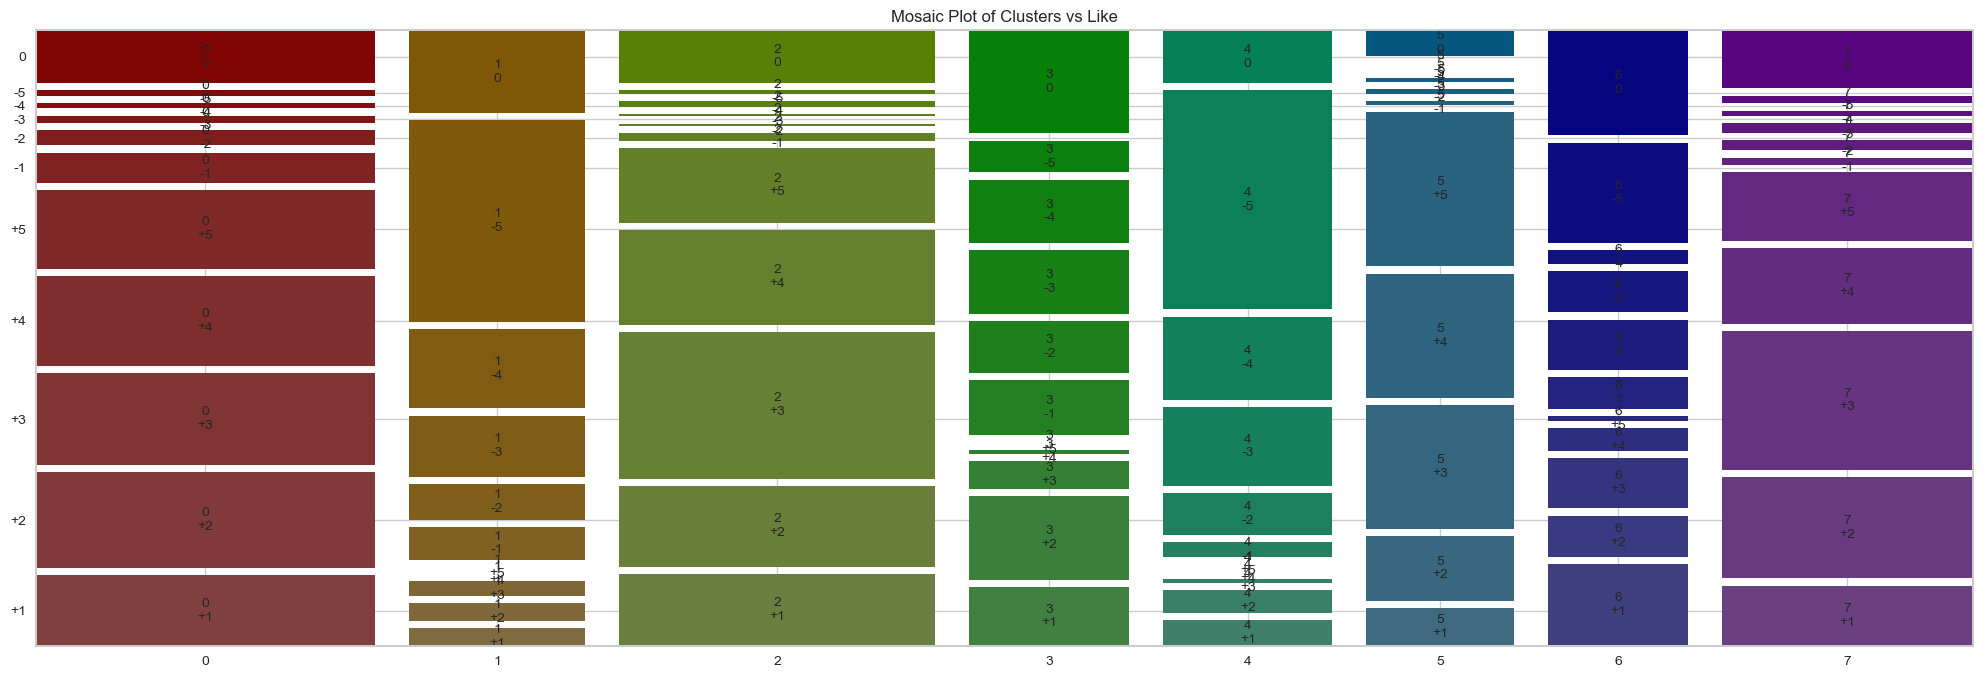

In [26]:
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

# Add the cluster labels if not already added
data['Cluster'] = final_labels  # Ensure `final_labels` exists

# Generate a crosstab of clusters and 'Like' column
crosstab = pd.crosstab(data['Cluster'], data['Like'])
print(crosstab)

# Visualize using a mosaic plot
plt.figure(figsize=(10, 6))
mosaic(crosstab.stack(), gap=0.02, title="Mosaic Plot of Clusters vs Like")
plt.show()



In [27]:
crosstab_gender =pd.crosstab(data['Cluster'],data['Gender'])
crosstab_gender

Gender,Female,Male
Cluster,,
0,167,123
1,63,88
2,166,104
3,80,57
4,83,61
5,69,58
6,50,69
7,110,105


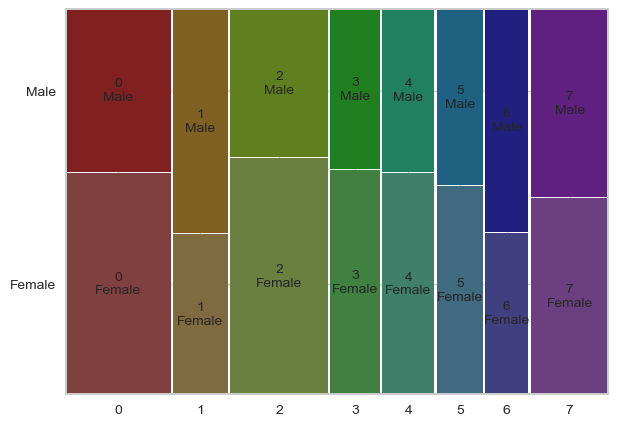

In [28]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='Cluster', ylabel='Age'>

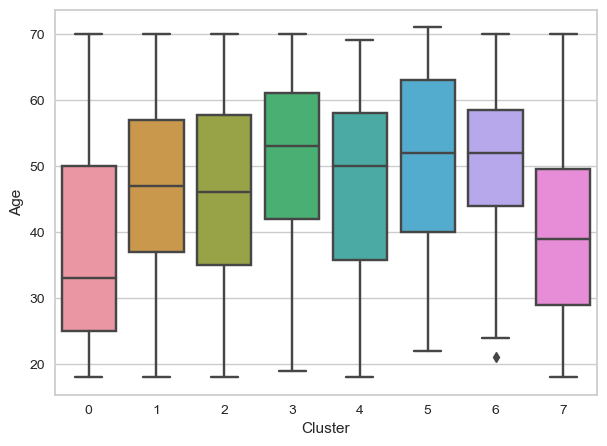

In [29]:
sns.boxplot(x="Cluster", y="Age", data=data)

In [30]:
from sklearn.preprocessing import StandardScaler

# Step 1: Encode the 'VisitFrequency' column
visit_frequency_mapping = {
    'Every day': 7,
    'Several times a week': 5,
    'Once a week': 4,
    '2–3 times a month': 3,
    'Once a month': 2,
    'Every three months': 1,
    'Never': 0
}

data['VisitFrequency'] = data['VisitFrequency'].map(visit_frequency_mapping)

# Step 2: Scale the 'VisitFrequency' column
scaler = StandardScaler()
data['VisitFrequency'] = scaler.fit_transform(data[['VisitFrequency']])

# Step 3: Calculate mean VisitFrequency for each cluster
visit = data.groupby('Cluster')['VisitFrequency'].mean().reset_index()

# Step 4: Display the result
print(visit)


   Cluster  VisitFrequency
0        0        0.247058
1        1       -0.676410
2        2        0.262562
3        3       -0.230253
4        4       -0.870427
5        5        0.323257
6        6       -0.242147
7        7        0.212252


In [31]:
# Step 1: Encode the 'Gender' column
gender_mapping = {
    'Male': 1,
    'Female': 0
}

data['Gender'] = data['Gender'].map(gender_mapping)

# Step 2: Calculate mean Gender for each cluster
gender_cluster_means = data.groupby('Cluster')['Gender'].mean().reset_index()

# Step 3: Display the result
print(gender_cluster_means)


   Cluster    Gender
0        0  0.424138
1        1  0.582781
2        2  0.385185
3        3  0.416058
4        4  0.423611
5        5  0.456693
6        6  0.579832
7        7  0.488372


In [32]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the 'Like' column using LabelEncoder
data['Like'] = LabelEncoder().fit_transform(data['Like'])

# Step 2: Calculate the mean 'Like' score for each cluster
like_cluster_means = data.groupby('Cluster')['Like'].mean().reset_index()

# Step 3: Display the result
print(like_cluster_means)


   Cluster      Like
0        0  3.268966
1        1  7.596026
2        2  3.000000
3        3  5.532847
4        4  7.493056
5        5  3.007874
6        6  5.596639
7        7  3.200000


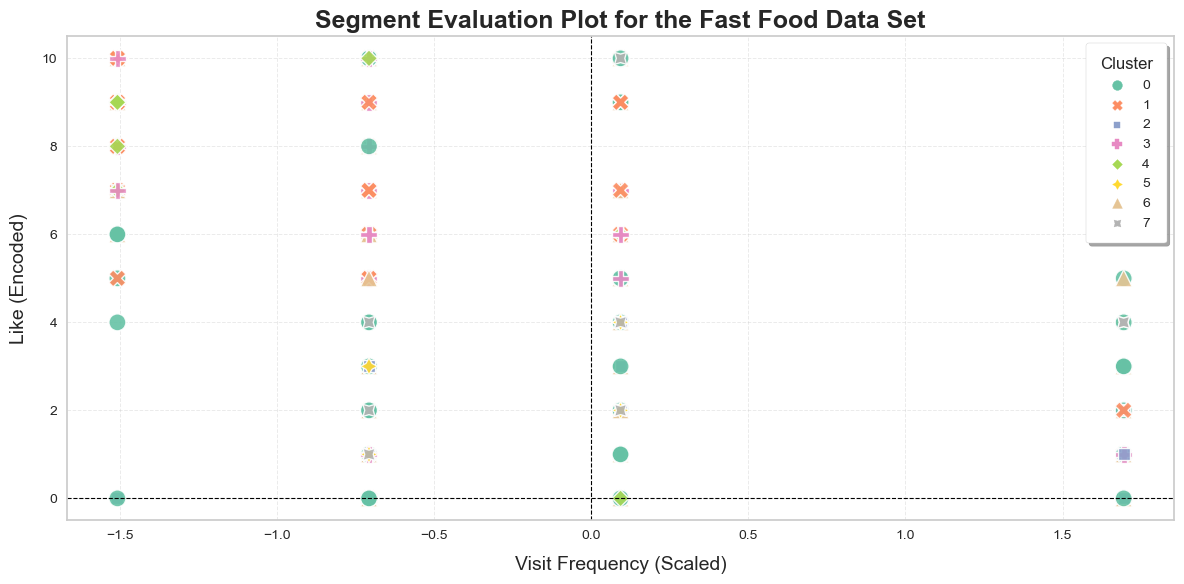

In [33]:
plt.figure(figsize=(12, 6))

# Enhanced scatterplot with better visual distinctions
sns.scatterplot(
    x="VisitFrequency",
    y="Like",
    hue="Cluster",  # Different colors for clusters
    style="Cluster",  # Different markers for clusters
    data=data,
    s=150,  # Adjusted point size for better visibility
    palette="Set2",  # Softer and distinct color palette
    alpha=0.9  # Less transparency for a sharper look
)

# Add gridlines and customize axes
plt.grid(alpha=0.4, linestyle='--', linewidth=0.7)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Horizontal line at y=0
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")  # Vertical line at x=0

# Add titles and labels with improved font sizes
plt.title("Segment Evaluation Plot for the Fast Food Data Set", fontsize=18, fontweight="bold")
plt.xlabel("Visit Frequency (Scaled)", fontsize=14, labelpad=10)
plt.ylabel("Like (Encoded)", fontsize=14, labelpad=10)

# Customize legend
plt.legend(
    title="Cluster",
    title_fontsize=12,
    fontsize=10,
    loc="upper right",
    frameon=True,
    shadow=True,
    borderpad=1
)

# Show the plot
plt.tight_layout()
plt.show()


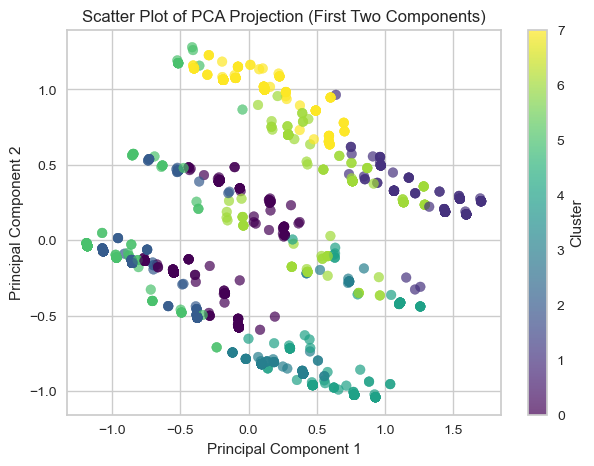

In [34]:


# Get the coordinates of the data projected onto the first two principal components
proj_data = pca.transform(MD_x)[:, :2]

# Plot the scatter plot
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7, c=final_labels, cmap='viridis')
plt.title("Scatter Plot of PCA Projection (First Two Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()